Добро пожаловать на седьмой вебинар, посвященный библиотекам машинного обучения в Python! В этой части мы рассмотрим следующие темы:

- Множественная регрессия (Multiregression case)
- Прогнозы
- Inference на CPU с использованием Treelite
- Перекрёстная проверка (Cross-validation)
- Расширенные опции для обработки многомерного вывода (Advanced options for multioutput handling)

# 1. Множественная регрессия

## 1.1. Что такое множественная регрессия?

Множественная регрессия — это тип регрессионного анализа, который позволяет моделировать зависимости между одной зависимой переменной и несколькими независимыми переменными. В контексте машинного обучения это означает, что мы пытаемся предсказать несколько выходных значений на основе набора входных признаков.

## 1.2. Пример использования множественной регрессии

Рассмотрим задачу прогнозирования цен на жилье, где мы хотим предсказать одновременно цену продажи и арендную плату на основе признаков недвижимости.

## 1.3. Реализация в Python

Используем библиотеку scikit-learn для построения модели множественной регрессии.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Генерация синтетических данных
X, y = make_regression(n_samples=200, n_features=2, n_targets=2, noise=0.1, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели множественной регрессии
model = MultiOutputRegressor(LinearRegression())

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipyk

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipyk

AttributeError: _ARRAY_API not found

Mean Squared Error: 0.01


# 2. Прогнозы

## 2.1. Что такое прогнозы в машинном обучении?

Прогнозы — это предсказания модели на новых данных, которые модель не видела во время обучения. Они используются для оценки производительности модели и решения практических задач.

## 2.2. Реализация прогнозов

Продолжим работу с предыдущей моделью и визуализируем результаты прогнозов.

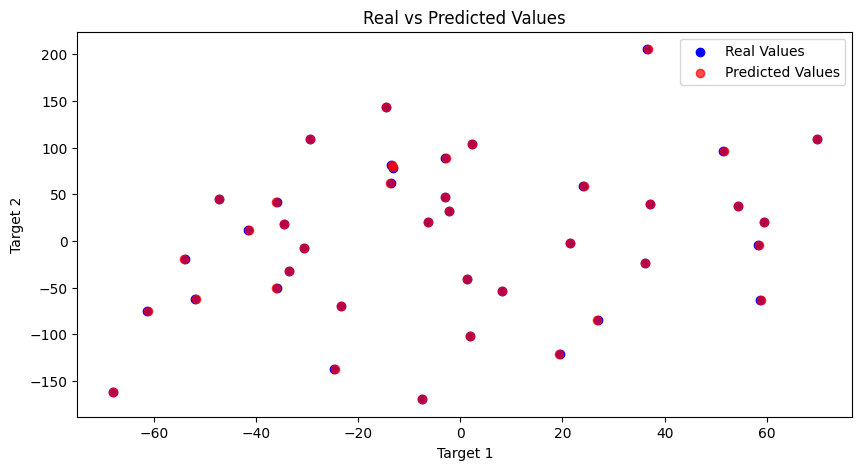

In [2]:
# Визуализация реальных и предсказанных значений
plt.figure(figsize=(10,5))

# Реальные значения
plt.scatter(y_test[:,0], y_test[:,1], color='blue', label='Real Values')

# Предсказанные значения
plt.scatter(y_pred[:,0], y_pred[:,1], color='red', label='Predicted Values', alpha=0.7)

plt.title('Real vs Predicted Values')
plt.xlabel('Target 1')
plt.ylabel('Target 2')
plt.legend()
plt.show()

# 4. Перекрёстная проверка (Cross-validation)

## 4.1. Что такое перекрёстная проверка?

Перекрёстная проверка — это техника оценки модели, при которой данные разделяются на несколько блоков (фолдов), и обучение и тестирование модели происходит несколько раз, каждый раз на разных фолдах. Это позволяет получить более стабильную оценку модели.

## 4.2. Реализация перекрёстной проверки

Используем KFold для выполнения перекрёстной проверки.


In [3]:
# Генерация синтетических данных
X, y = make_regression(n_samples=200, n_features=2, n_targets=2, noise=0.1, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.model_selection import KFold, cross_val_score

# Инициализация модели
model = MultiOutputRegressor(LinearRegression())

# Определение K-фолдов
kf = KFold(n_splits=5)

# Оценка модели с использованием перекрёстной проверки
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE scores: {-cv_scores}")
print(f"Average MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE scores: [0.00967565 0.00869853 0.01112969 0.00948257 0.01163036]
Average MSE: 0.01


# 5. Расширенные опции для обработки многомерного вывода

## 5.1. Проблема многомерного вывода

В задачах с несколькими выходами бывает необходимо учитывать взаимосвязь между целевыми переменными.

## 5.2. Модели, поддерживающие многомерный вывод

Некоторые алгоритмы в scikit-learn могут напрямую работать с многомерным выводом без необходимости в MultiOutputRegressor.

Пример: Решение многомерной регрессии с помощью KNeighborsRegressor

In [5]:
from sklearn.neighbors import KNeighborsRegressor

# Инициализация модели KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Обучение модели
knn_model.fit(X_train, y_train)

# Прогнозирование
y_pred_knn = knn_model.predict(X_test)

# Оценка модели
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn:.2f}")

KNN Mean Squared Error: 98.48


# 5.3. Использование регрессии PLS

Метод частных наименьших квадратов (PLS) позволяет моделировать данные с большим количеством признаков и целевых переменных.

In [6]:
from sklearn.cross_decomposition import PLSRegression

# Инициализация модели PLS
pls_model = PLSRegression(n_components=2)

# Обучение модели
pls_model.fit(X_train, y_train)

# Прогнозирование
y_pred_pls = pls_model.predict(X_test)

# Оценка модели
mse_pls = mean_squared_error(y_test, y_pred_pls)
print(f"PLS Mean Squared Error: {mse_pls:.2f}")

PLS Mean Squared Error: 0.01
